In [28]:
from tensorflow import keras

model = keras.models.load_model('best-cnn-model.h5')

In [29]:
model.layers

In [30]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [31]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.0346561 0.26942936


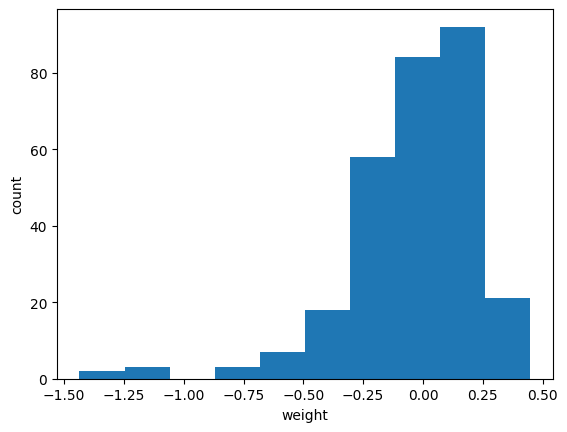

In [32]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [33]:
conv_weights

array([[[[-3.93576771e-01, -5.50114624e-02,  1.55296531e-02,
           2.22284988e-01,  4.46033478e-02,  3.82719368e-01,
           1.15873493e-01,  1.49401009e-01, -3.20410609e-01,
          -7.71562476e-03, -7.48099163e-02, -1.69011638e-01,
          -1.09195746e-01, -9.21246111e-02, -1.29635245e-01,
          -2.08124503e-01, -1.82529703e-01, -5.10528572e-02,
          -3.86749255e-03, -1.08565319e+00, -2.97514081e-01,
          -3.87493484e-02,  2.31038958e-01, -1.46110684e-01,
          -8.19673166e-02, -2.27299005e-01,  6.01174086e-02,
          -1.13028593e-01,  6.54017851e-02,  1.10170528e-01,
           1.52627975e-01,  7.48396888e-02]],

        [[ 2.67643243e-01, -1.81281611e-01,  1.41115874e-01,
          -5.34111440e-01,  3.11547488e-01, -7.19724894e-01,
          -6.59315661e-02,  2.73641199e-01,  1.46603286e-01,
           1.24967203e-03,  7.91724697e-02, -2.19641682e-02,
          -3.75064872e-02,  1.73900917e-01,  1.52018085e-01,
          -2.19214201e-01,  1.42372191

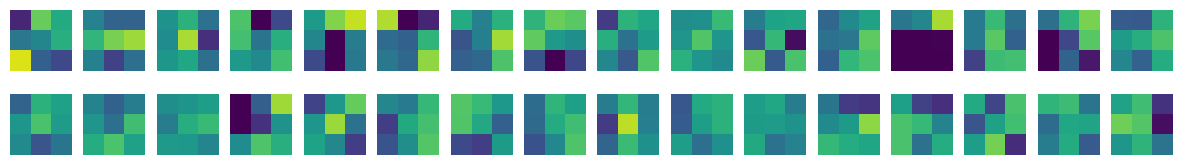

In [34]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16 +j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [35]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [36]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [37]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.007773986 0.08172011


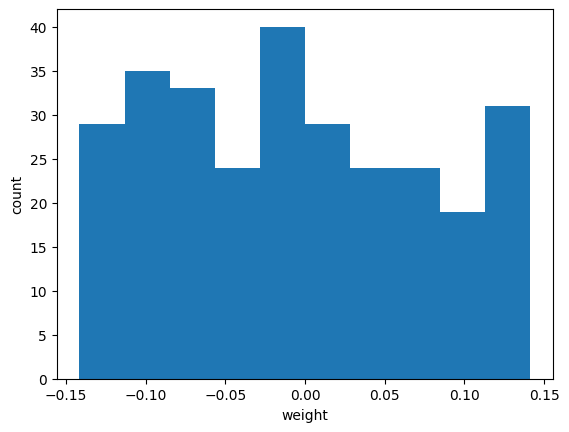

In [38]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

함수형 API

In [20]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

In [25]:
# inputs = keras.Input(shape=(784,))
# hidden = dense1(inputs)
# outputs= dense2(hidden)
# model = keras.Model(inputs, outputs)

In [39]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [40]:
conv_acti = keras.Model(model.input, model.layers[0].output)

feature map visualization

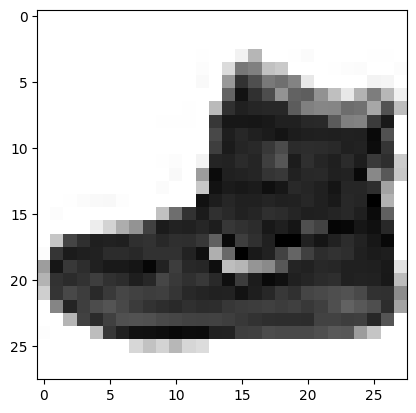

In [41]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [42]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 218ms/step


In [44]:
print(feature_maps.shape)

(1, 28, 28, 32)


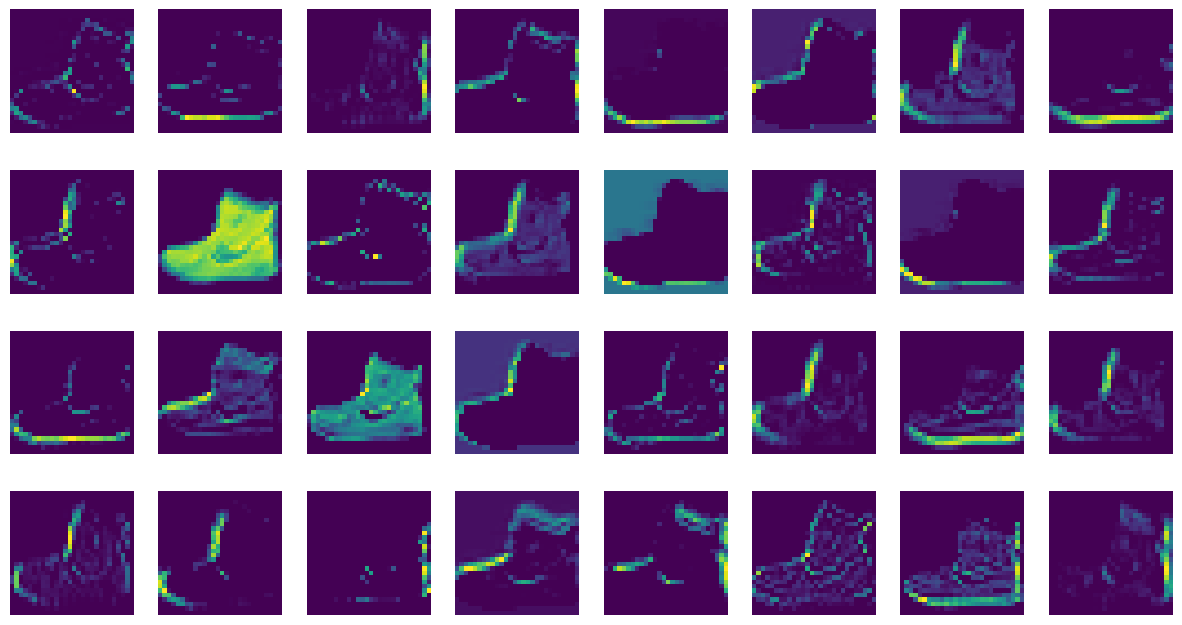

In [46]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

밝은 부분이 높은값 -> 더 잘잡는다

In [47]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [48]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 63ms/step


In [49]:
print(feature_maps.shape)

(1, 14, 14, 64)


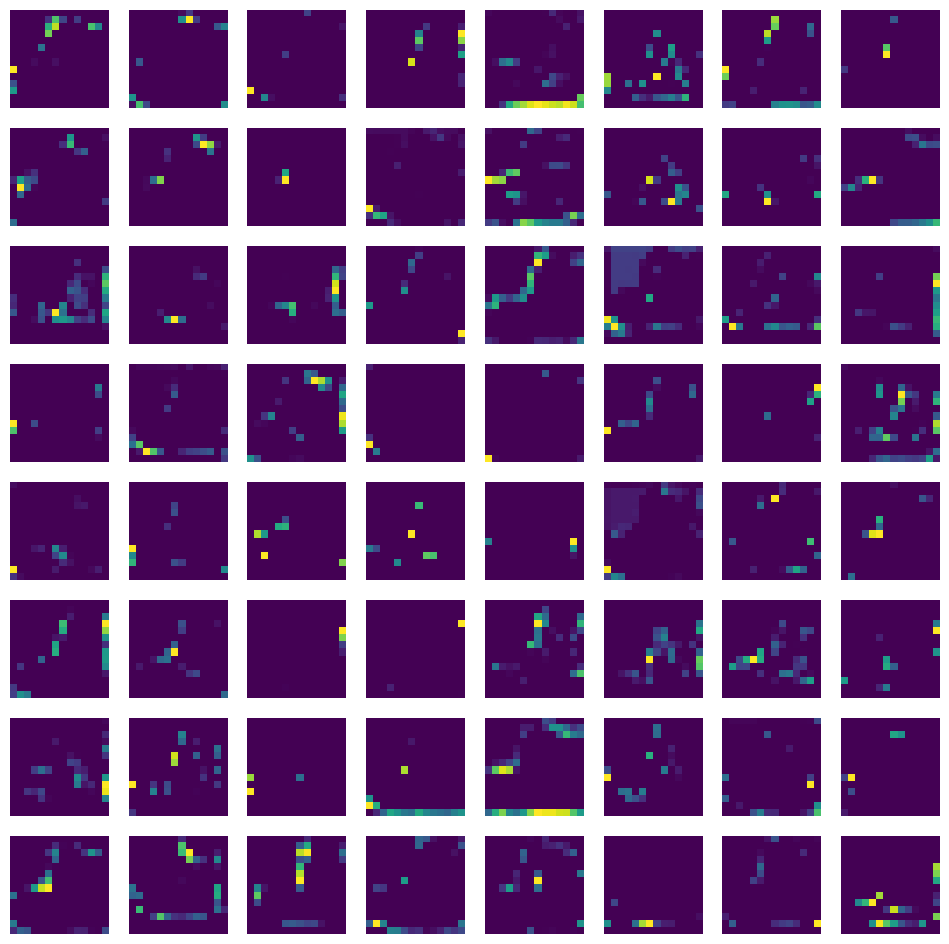

In [51]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()